# Machine Learning

## The Scikit Learn module

The [scikit learn](https://scikit-learn.org/stable/) module is an open source module dedicated to implementing machine learning methods in python. It is the tool we will use for the next few weeks to explore these methods and apply them to some data.

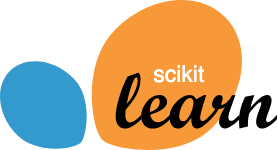

- There are particular sections of the module dedicated to supervised and unsupervised machine learning tasks (recall these are where we have training examples and where we do not respectively). 

- Here we are going to focus on supervised classification methods (KNNs and Decision Tree example), that is, given training data classified into two classes (denoted 1 and 0), we want to use that data to construct a way to classify new data points based on that information.

Firstly we are going to need to import some modules and functions to get started (we'll particularly take sub-modules connected to nearest neighbours and decision trees):

In [ ]:
# Importing the pandas library for data manipulation and analysis
import pandas as pd

# Importing the entire scikit-learn library,
import sklearn as skl

# Importing matplotlib.pyplot for plotting and visualizing data
import matplotlib.pyplot as plt

# Importing seaborn, a data visualization library built on top of matplotlib
import seaborn as sns

# Importing neighbors module from scikit-learn, which includes algorithms for classification and regression 
import sklearn.neighbors as nei

# Importing the tree module from scikit-learn, which provides decision tree algorithms 
import sklearn.tree as tree

For the given examples below, it is better to check out these functions in detail during your study

- **KNN model fit :** [KNeighborsClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

- **Data Splitting:** [train_test_split](https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.train_test_split.html)

- **Decision Tree model fit:** [DecisionTreeClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
    

## Reproducibility of the results

To make sure that we will get the same output if we run the same function several times, we provide the pseudorandom number generator with a fixed seed using the `random_state` parameter. 

This will make the outcome deterministic, so this line will always have the same outcome. 

- To control this, we should be careful about the use of `train_test_split` and `DecisionTreeClassifier` function input arguments for this week material

- We can set that value in advance in this format given below

In [ ]:
# For the fixed seed
random_state = 42

## First example: Simulated Data

The first example we will work with is a synthetic dataset, made as it just has two features, which means we can plot the data points within the feature space more easily to get a handle on what's going on.

Our dataset comes split in two parts `synth.tr.csv` and `synth.te.csv`, the first one containing our training data and the second our test data. Both therefore have labels, but recall we don't use the labels in the test set to build our model, just to compare with the predictions of our classifier to see how well we do.

First let's load in the training dataset and have a look at it. Here is a scatter plot.

In [ ]:
# Load training data from a CSV file into a pandas DataFrame
class_data = pd.read_csv('synth.tr.csv')

# Display the first five rows of the dataset to understand its structure
print(class_data.head())

In [ ]:
# Create a scatter plot of 'xs' vs 'ys' from the training data, colored by 'yc' class labels
sns.scatterplot(data=class_data, x='xs', y='ys', hue='yc')

# Add a title to the plot and show the plot
plt.title('Scatter plot - coloured by class')
plt.show()

## Fitting KNN

Next we want to make a [K nearest neighbour classifier](https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) based on this training data. To do that we start a classifier model, specifying K and the distance metric we will use (here we specify `K=3`, and normal `Euclidean` distance).

We can predict a value of the class label for a made up data point - here we try the point (0,1) which looks like it should definitely be a 1 since it is in the middle of lots of orange points in the plot above.

In [ ]:
# Initialize a k-nearest neighbors classifier with k=3 neighbors and Euclidean distance metric
knn_class = nei.KNeighborsClassifier(n_neighbors=3, metric='euclidean')

# Fit the KNN classifier on the training data ('xs' and 'ys' as input, 'yc' as target labels)
knn_class.fit(class_data[['xs', 'ys']], class_data['yc'])

# Use the trained classifier to predict the class for a new data point [0, 1]
print(knn_class.predict([[0, 1]]))

**Don't worry about the warning we get from the last line - this is just saying we passed in data without heading names within a dataframe - and the training data was in a dataframe - so just warning us of the mismatch.**

Note that we have two methods associated with our classifier (denoted by the . notation to get to them). 

- One is the `fit()` method that we pass in our data to. The pattern is the data points - here simply two columns of our dataframe, and then the associated label, here contained in another column of our dataframe. 

- The second method `predict()` is used to apply our classifier to a new data point - we can give it a data point and ask what class the classifier gives as an output.

- As you explored above, the default settings of the parameters in `KNeighborsClassifier()` function is crucial, since by default it runs k=5 case as `n_neighbors=5` and `metric='minkowski'`. Make sure that you did the correct changes

So far so good then. We have a classifier, and we can test it out on a data point and it gives a classification. The next step is to look at our test data and see if we can begin to qunatify how well our classifier has done.

First we can load in and have a look at the test data:

In [ ]:
# Load test data from a CSV file into a pandas DataFrame
test_data = pd.read_csv('synth.te.csv')

# Create a scatter plot of 'xs' vs 'ys' from the test data, using green color for all points
sns.scatterplot(data=test_data, x="xs", y="ys", color='green')

# Add a title to the plot and show the plot
plt.title("Scatter plot of test data")
plt.show()

These are all of the data points in the test dataset. We then have to classify them by using our classifier above. It will find the nearest three points in our training dataset to each point here, and let them vote on the class for the point. With 3 neighbours selected there cannot be a draw.

We can use the `predict()` method again here, this time passing in all of the data points within our test dataset. The next line creates a new column of the dataframe which we call 'class'.

In [ ]:
# Use the trained KNN classifier to predict the class labels for the test data
test_data['class'] = knn_class.predict(test_data[['xs', 'ys']])

# Print the test data with predicted class labels
print(test_data)

We can look at the results of this classification. Here is the test dataset coloured according to the predicted class of each point:

In [ ]:
# Create a scatter plot of 'xs' vs 'ys' from the test data, colored by predicted class
sns.scatterplot(data=test_data, x="xs", y="ys", hue='class')

# Add a title to the plot and show the plot
plt.title("Scatter plot - test data coloured by class")
plt.show()

We could also overlay on the plot all of the training data. Here we do that using triangular markers for the training data.

You can look to see the closest 3 triangles to each circle - they are the ones which voted on that classification.

In [ ]:
# Create a scatter plot of 'xs' vs 'ys' from original data, colored by predicted class
sns.scatterplot(data=class_data, x="xs", y="ys", hue="yc", marker='^',legend=None)

# Create a scatter plot of 'xs' vs 'ys' from test data, colored by predicted class
sns.scatterplot(data=test_data, x="xs", y="ys",hue='class')

# Add a title to the plot and show the plot
plt.title("Scatter plot - test data coloured by class")
plt.show()

## Assessing the classifier

Looking at our test dataset we have two columns now which contain the real class of our data points 'yc', and the predicted class 'class'.

In [ ]:
# Printing the first five observations from test data with real vs predicted classes
print(test_data.head())

Note that we can't see much from just the top of the dataframe. But if we look through the dataframe we can find locations where the values in these two columns don't match:

In [ ]:
# Subsetting the cases where the true and predicted values do not match
print(test_data[test_data['yc']!=test_data['class']])

- Note we have made both types of errors here (FP and FN cases), places where we have predicted a 1 but the real answer was a 0 - a False Positive. And also places where we precited a 0 but the real answer was 1 a False Negative.

We can summarise all of the True/False Positive/Negatives in a confusion matrix. We can also look at the balanced accuracy and F scores (look back at the slides to see the definitions of each of these). 

In [ ]:
# Compute and display the confusion matrix comparing true labels with predicted labels
print(skl.metrics.confusion_matrix(y_true = test_data['yc'], y_pred = test_data['class']))

# Compute and display the balanced accuracy score for the model's predictions
print(skl.metrics.balanced_accuracy_score(y_true = test_data['yc'], y_pred = test_data['class']))

# Compute and display the F1 score for the model's predictions
print(skl.metrics.f1_score(y_true = test_data['yc'], y_pred = test_data['class']))

We can see we do a pretty good job, the majority of points are well classified. 

Let's compare to another model to see if we can do better - let's try KNN for the case K=5. Here we fit that model, predict the classes on the test dataset and compute our scores again just as before:

In [ ]:
# Initialize a k-nearest neighbors classifier with k=5 neighbors and Euclidean distance metric
# and fit for the data again, then make predictions
knn_class = nei.KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
knn_class.fit(class_data[['xs','ys']],class_data['yc'])
test_data['class'] = knn_class.predict(test_data[['xs','ys']])

# Compute and display the confusion matrix comparing true labels with predicted labels
print(skl.metrics.confusion_matrix(y_true = test_data['yc'],y_pred = test_data['class']))
# Compute and display the balanced accuracy score for the model's predictions
print(skl.metrics.balanced_accuracy_score(y_true = test_data['yc'], y_pred = test_data['class']))
# Compute and display the F1 score for the model's predictions
print(skl.metrics.f1_score(y_true = test_data['yc'],y_pred = test_data['class']))

### Classification Metric summary

It is possible to get a classification metrics summary by using the function called [`classification_report`](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.classification_report.html), as exemplified below

In [ ]:
# Build a text report showing the main classification metrics.
from sklearn.metrics import classification_report

# Generate and display a detailed classification report
print(classification_report(test_data['yc'], test_data['class']))

So by all of these metrics the K=5 classifier appears to be a bit better than the K=3. 

## Second example: Diabetes Data Set


This second data, namely `pima-indians-diabetes.csv` contains measurements of various health indicators for use as a predictor for whether the study participants would go on to develop diabetes. The final column gives the true outcome for what happened to each participant.

We can load in the data. Note there are more columns in this data - so the feature space is now 8-dimensional, which means we cannot simply visualise it all now. We will just look at a cross-section of the feature space and show the sixth column against the second column to get a small sense of how the feature space looks.

Data Source: [Smith, J. W., Everhart, J. E., Dickson, W. C., Knowler, W. C. and Johannes, R. S. (1988) Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications in Medical Care (Washington, 1988), ed. R. A. Greenes, pp. 261–265. Los Alamitos, CA: IEEE Computer Society Press.](https://pmc.ncbi.nlm.nih.gov/articles/PMC2245318/)

In [ ]:
# Uploading data set via pandas
diabetes_data = pd.read_csv('pima-indians-diabetes.csv')
# Looking at the first five observations by using head
print(diabetes_data.head())

# Below returns a view object, that contains the keys of the dictionary, as a list.
print(diabetes_data.keys())

In [ ]:
# Looking at the relationship between glu and bmi based on class split
sns.scatterplot(data=diabetes_data, x='glu', y='bmi', hue='class')
plt.title("Scatter plot - coloured by class")
plt.show()

- We can see some separation of the different classes, but of course we are missing the other directions in the feature space in our plot, so we can't tell whether those which merge together in the middle in our plot might separate out more if we look at other planes of the data.

- In this data set all of the labelled data is clumped in together in one file. **So we need to split it ourselves into a training set and a test set.** We can use a function called [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.train_test_split.html) in scikit learn to do this for us. 

Note the form of the following line. 

  >- The function outputs data points for the train and test portions, and separately the classes for the train and test data points - usually called X and y respectively. 
  >- In the input of the function we need to give the columns of data which make up our feature space, and the column with our labels. We also need to specify what fraction of the data we want to be used as a test set (usually we want to retain most of the data to do training with). 
  >- Here we specify a third of the data to be our test set.

In [ ]:
# Splitting the data set into train and test subset 
X = diabetes_data[['npreg', 'glu', 'bp', 'skin', 'ins', 'bmi', 'ped', 'age']]

y = diabetes_data['class']
# Considered split ratio is the 70/30 for the train/test subsetting
X_train, X_test, y_train, y_test = skl.model_selection.train_test_split(X, y, test_size=0.30, 
                                                                        random_state = random_state)


In [ ]:
# Check the shape (dimension) of the original data, training and testing datasets
print(diabetes_data.shape)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Next we can use the `fit()` method to fit our KNN classifier for K=3. Then use the `predict()` method on our test data to obtain predicted classes for each data point in the test set.

In [ ]:
# Initialize a k-nearest neighbors classifier with k=3 neighbors and Euclidean distance metric
knn_class = nei.KNeighborsClassifier(n_neighbors = 3, metric='euclidean')

# Fit the KNN classifier on the training data
knn_class.fit(X_train, y_train)

# Use the trained classifier to predict the class for a new data point
y_predict = knn_class.predict(X_test)

print(y_predict)

Now we have both the real classes (contained in `y_test`) and the predicted classes (contained in `y_predict`) we can use these to obtain our various metrics to determine how well our classifier performed:

In [ ]:
# Generating the Confusion matrix
print('Confusion matrix: ',skl.metrics.confusion_matrix(y_test,y_predict))

# Calculating the Precision value
print('Precision: ',skl.metrics.precision_score(y_test,y_predict))

# Calculating the Recall value
print('Recall: ',skl.metrics.recall_score(y_test,y_predict))

# Calculating the Balanced accuracy
print('Balanced accuracy: ',skl.metrics.balanced_accuracy_score(y_test,y_predict))

# Calculating the F1 score
print('F1 score: ',skl.metrics.f1_score(y_true=y_test,y_pred=y_predict))

We can also look at the difference between the true and predicted classes in our slice of the feature space. Here is what they look like - you can see at least a few points which are different across the two plots:

In [ ]:
sns.scatterplot(data=X_test, x='glu', y='bmi', hue=y_test)
plt.title("Scatter plot - coloured by class - true class")
plt.show()

sns.scatterplot(data=X_test, x='glu', y='bmi', hue=y_predict)
plt.title("Scatter plot - coloured by class - predicted class")
plt.show()

## Decision Trees

We can also fit a decision tree classifier to the same data, via [DecisionTreeClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

- The nice thing about the scikit learn module is that the `fit()` and `predict()` methods work in a reasonably standard way so fitting a new classifier model is pretty straightforward and follows a similar pattern.

- To do it we make a new decision tree classifier, use the `fit()` method with our training data, and use the `predict()` method with our test data - all in pretty similar fashion to the way we did this for the KNN case above:

In [ ]:
# Initialize a Decision Tree Classifier object
# To get the same result for each run, we fixed the random seed here, otherwise without 
# using `random_state=random_state` you can get different outputs
dt_class = tree.DecisionTreeClassifier(random_state=random_state)

# Train (fit) the Decision Tree classifier on the training data (X_train, y_train)
dt_fit = dt_class.fit(X_train, y_train)

# Use the trained Decision Tree classifier to predict the labels for the test data (X_test)
y_predict = dt_class.predict(X_test)

In [ ]:
# Visualize the trained Decision Tree
tree.plot_tree(dt_fit)

As you explore above, some of the parameters of the DecisionTreeClassifier is really crucial to work out including the `max_depth`: The maximum depth of the tree, as an example 

If we use the default as `None`, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. As we can see from, there is a large complex tree appeared and not easy to navigate. 

To simplify a bit, let us set the `max_depth = 2` to see how the fit looks like if we consider such a pre-determined model parameter. 

In [ ]:
# Initialize a Decision Tree Classifier object
dt_class = tree.DecisionTreeClassifier(max_depth = 2, random_state = random_state)

# Train (fit) the Decision Tree classifier on the training data (X_train, y_train)
dt_fit = dt_class.fit(X_train, y_train)

# Use the trained Decision Tree classifier to predict the labels for the test data (X_test)
y_predict = dt_class.predict(X_test)

# Visualize the trained Decision Tree
tree.plot_tree(dt_fit)

Now we can see more readable tree fit output, but remember that we manually set the parameter as 2. 

- Considering the order of the variables in our data set from `X = diabetes_data[['npreg', 'glu', 'bp', 'skin', 'ins', 'bmi', 'ped', 'age']]`, looks like in the root node, the variable `glu` is selected to start with the splitting, thereafter `bmi` and `age` are used in the internal nodes. 

- In terms of the split, we can see which proportions of the data is splitted as diabetes or non-diabetes, which are captures in the `value` (such as 349 vs 188, their sum should match with the `samples` value) parameter for the each node based on the model fit. 

- This structure is preserved for the all nodes from root node to the leafs (from top to the bottom)

- In terms of the flow of the decision tree, when the `glu <=154.5` is **TRUE**, we followed the left branch and considered the `age` parameter for another split whereas if the condition `glu <=154.5` is not true (**FALSE**), tree splitting follows the right-hand-side branch and the model used `bmi` for further split. 

- In each node, we have also unique indicator called `Gini impurity` that we did not discuss in detail so far. For the scope of our course, no need to worry about its technical details but feel free to explore from that reading blog;

[A Simple Explanation of Gini Impurity](https://victorzhou.com/blog/gini-impurity/)



Now we have the true and predicted classes again, we can go ahead and find all of the metrics which detail how well the classifier has worked:

In [ ]:
# Generating the Confusion matrix
print('Confusion matrix: ',skl.metrics.confusion_matrix(y_test,y_predict))

# Calculating the Precision value
print('Precision: ',skl.metrics.precision_score(y_test,y_predict))

# Calculating the Recall value
print('Recall: ',skl.metrics.recall_score(y_test,y_predict))

# Calculating the Balanced accuracy value
print('Balanced accuracy: ',skl.metrics.balanced_accuracy_score(y_test,y_predict))

# Calculating the F1 score value
print('F1 score: ',skl.metrics.f1_score(y_true = y_test, y_pred = y_predict))

Comparing to the KNN classifier above it looks like this does generally worse.

**Self-Thinking**: How do you compare both results regarding each performance metrics one by one ?
Focus more on FP/FN values or certain metrics we obtained above.

Once again we can plot our cross section of the data showing the real and predited classes - again we can see some differences as we would expect:

In [ ]:
sns.scatterplot(data=X_test, x='glu', y='bmi', hue=y_test)
plt.title("Scatter plot - coloured by class - true class")
plt.show()

sns.scatterplot(data=X_test, x='glu', y='bmi', hue=y_predict)
plt.title("Scatter plot - coloured by class - predicted class")
plt.show()

## Exercises

Here is a new dataset that contains 4 columns in the relevant dataframe. 
**The first 3 columns represent the features, the fourth is the real class of each data point.**

In [ ]:
operation_data = pd.read_csv('haberman.csv')

print(operation_data.head())
print(operation_data.keys())

1) Split the data up into a training and test dataset, use 50% of the data in each set.

2) Fit a decision tree classifier to the data and output the balanced accuracy and F1 score.

Hint: Consider fixing the `random_state` parameter inside of the `DecisionTreeClassifier()` function

3) Fit the KNN classifier with K=3 to the data and output the balanced accuracy and F1 score.

4) Which method did best? What's your justification for that conclusion?